In [1]:
import os
import pandas as pd
import numpy as np
import gdown
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('../')

In [3]:
url = 'https://drive.google.com/uc?/export=download&id=1F-07wKd5ymbEDvW5G_9su2pbtBnGIms3'
gdown.download(url, 'data/raw/data.csv')

Downloading...
From: https://drive.google.com/uc?/export=download&id=1F-07wKd5ymbEDvW5G_9su2pbtBnGIms3
To: /Users/ernestodavidserizeportela/WorkSpace/LGI-predictor/data/raw/data.csv
100%|██████████| 23.6k/23.6k [00:00<00:00, 34.4kB/s]


'data/raw/data.csv'

In [4]:
data = pd.read_csv('data/processed/data.csv')

In [5]:
data.columns

Index(['Edad', 'Sexo', 'Trastorno de consciencia', 'Apache', 'Leucocitos',
       'Glucemia', 'Glucemia en  mg/dl', 'Ilg', 'Estado al egreso',
       'Cardiopatía isquémica', 'Artritis gotosa', 'Dm',
       'Ave isquémico sin secuelas', 'Cefalea migrañosa',
       'Erc sin hemodialisis', 'Epoc', 'Cataratas', 'Hepatitis c',
       'Operado de adenocarcinoma de próstata', 'Erc', 'Hta', 'Artritis',
       'Insuficiencia venosa profunda', 'Insuficiencia cardíaca',
       'Apnea del sueño', 'Ch', 'Hipotiroidismo', 'Fa', 'Salud anterior',
       'Glaucoma', 'Esquizofrenia', 'Insuficiencia venosa periférica',
       'Tumor de ovarios', 'Bnb nosocomial',
       'Insuficiencia respiratoria aguda', 'Sepsis intravascular',
       'Hiperglucemia', 'Bronconeumonía aspirativa',
       'Bronconeumonía asociada a la ventilación', 'Neumonía nosocomial',
       'Bronconeumonia aspirativa', 'Hipernatremia', 'Htec', 'Shock séptico',
       'Pcr recuperado', 'Convulsiones', 'Shock neurogénico',
       'Bnb

Text(0, 0.5, 'Frequency')

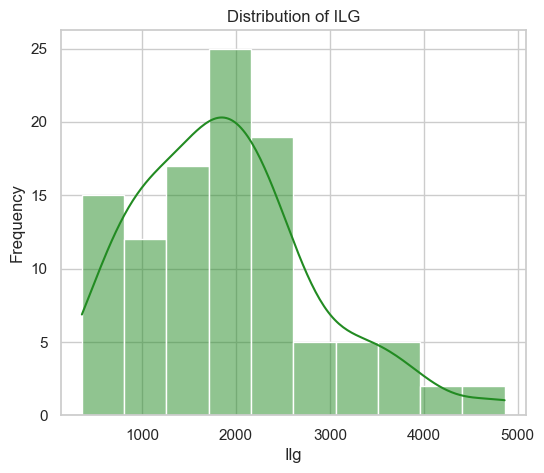

In [6]:
plt.figure(figsize=(6,5))
sns.set(style='whitegrid')
sns.histplot(data['Ilg'], color='forestgreen', kde=True)
plt.title('Distribution of ILG')
plt.ylabel('Frequency')

In [7]:
X, y = data.drop('Ilg', axis=1), data['Ilg']

In [8]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=12)

selector.fit_transform(X, y)

features = X.columns[selector.get_support(indices=True)]
features

Index(['Leucocitos', 'Glucemia', 'Glucemia en  mg/dl', 'Estado al egreso',
       'Insuficiencia venosa profunda', 'Apnea del sueño', 'Hipotiroidismo',
       'Fa', 'Esquizofrenia', 'Tumor de ovarios', 'Hipernatremia',
       'Shock neurogénico'],
      dtype='object')

In [9]:
X = X[features]

In [10]:
matrix = X.join(y).corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))

Text(0.5, 1.0, 'Correlation Matrix Between Selected Features')

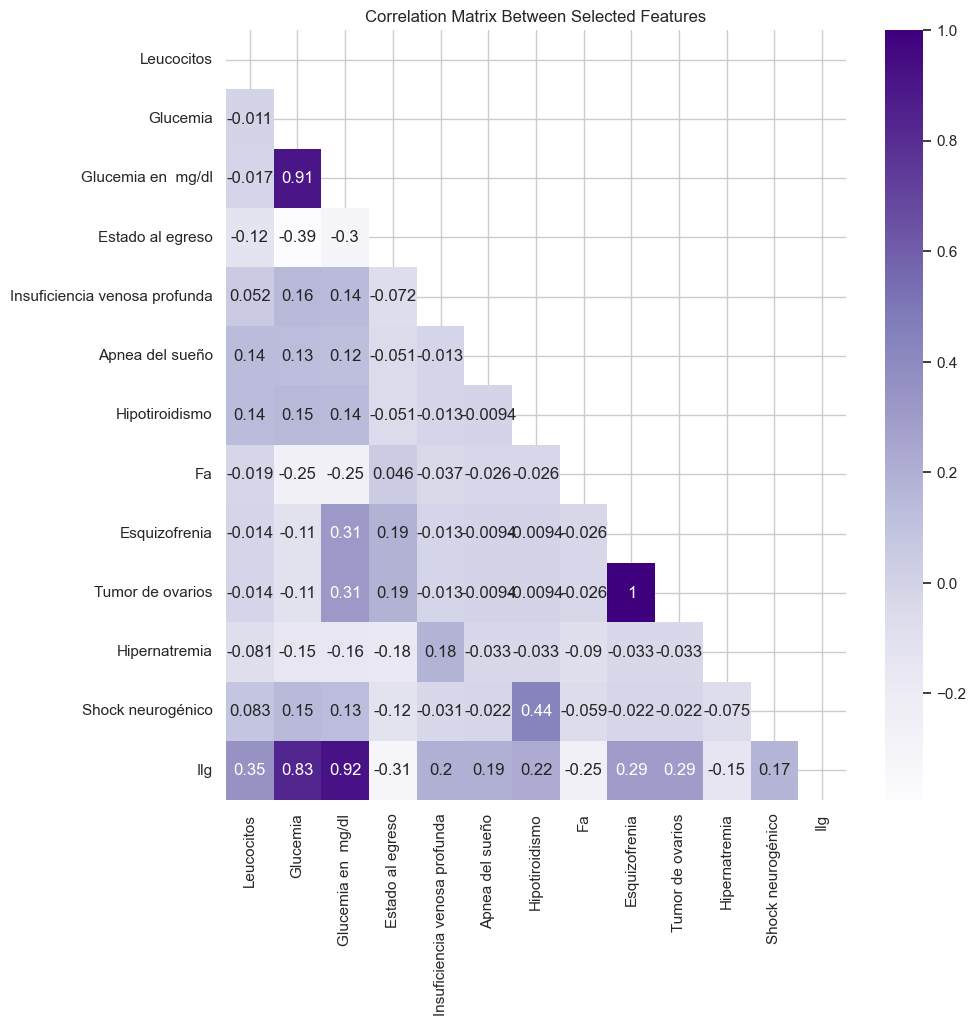

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, cmap='Purples', mask=mask)
plt.title('Correlation Matrix Between Selected Features')

In [12]:
X.drop(['Glucemia', 'Tumor de ovarios', 'Estado al egreso'], axis=1, inplace=True)

In [13]:
data = X.join(y)
data.to_csv('data/selected/data.csv', index=False)